# AE332: Modelling and Analysis Lab
## Session 1 (Part 2) : To solve convection and diffusion equations using the finite difference scheme 
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
c = 300 # m/s
L = 300
def u0(x):
    U = np.zeros_like(x)
    index = np.where(np.logical_and(x>=50, x<110))
    U[index] = 100 * np.sin(np.pi*(x[index]-50)/60)
    return U

In [3]:
def FTBS(X, T, dt, dx, u0):
    U = np.zeros((T.size, X.size))
    U[0, :] = u0 
    for t in range(T.size-1):
        U[t+1, 0] = U[t+1, X.size-1] = 0
        for x in range(1, X.size-2):
            U[t+1, x] = U[t, x] - c*dt/dx*(U[t,x] - U[t, x-1])

    return U

### For dx = 5

In [4]:
dx = 5
dt = 0.1*dx/c
X = np.arange(0,L+dx,dx)
T = np.arange(0, 1+dt, dt)

In [5]:
U0 = u0(X)
U = FTBS(X, T, dt, dx, U0)

In [6]:
U = FTBS(X, T, dt, dx, U0)

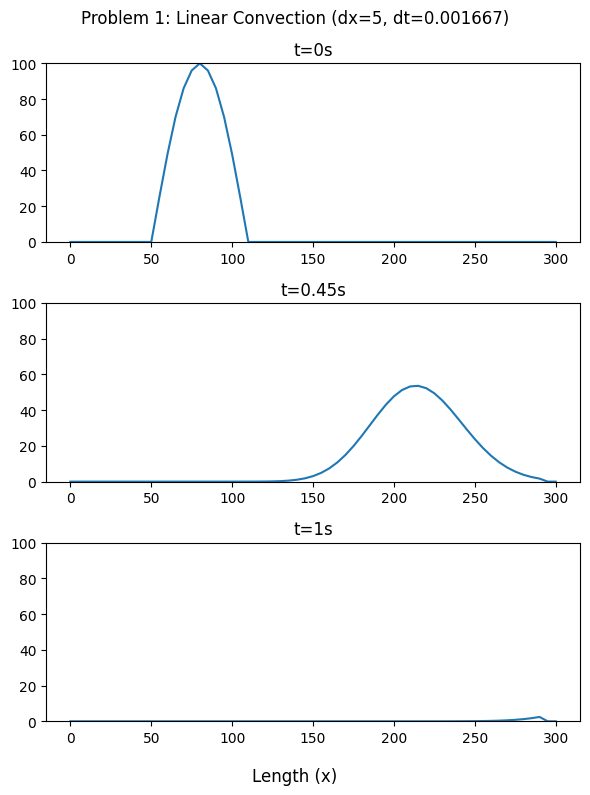

In [7]:
idx = (np.abs(T - 0.45)).argmin()
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,100])
plt.subplot(3,1,2)
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=0.45s')
plt.ylim([0,100])
plt.subplot(3,1,3)
plt.plot(X, U[T.size-1, :].ravel())
plt.title(label='t=1s')
plt.ylim([0,100])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 1: Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

### For dx = 2

In [8]:
dx = 2
dt = 0.1*dx/c
X = np.arange(0,L+dx,dx)
T = np.arange(0, 1+dt, dt)

In [9]:
U0 = u0(X)
U = FTBS(X, T, dt, dx, U0)

In [10]:
U = FTBS(X, T, dt, dx, U0)

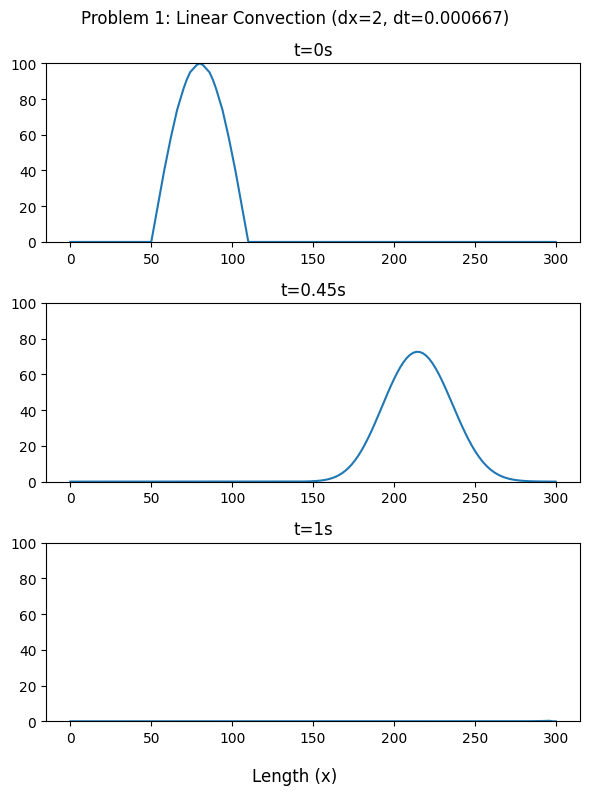

In [11]:
idx = (np.abs(T - 0.45)).argmin()
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,100])
plt.subplot(3,1,2)
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=0.45s')
plt.ylim([0,100])
plt.subplot(3,1,3)
plt.plot(X, U[T.size-1, :].ravel())
plt.title(label='t=1s')
plt.ylim([0,100])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 1: Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

### dx = 1

In [12]:
dx = 1
dt = 0.1*dx/c
X = np.arange(0,L+dx,dx)
T = np.arange(0, 1+dt, dt)

In [13]:
U0 = u0(X)
U = FTBS(X, T, dt, dx, U0)

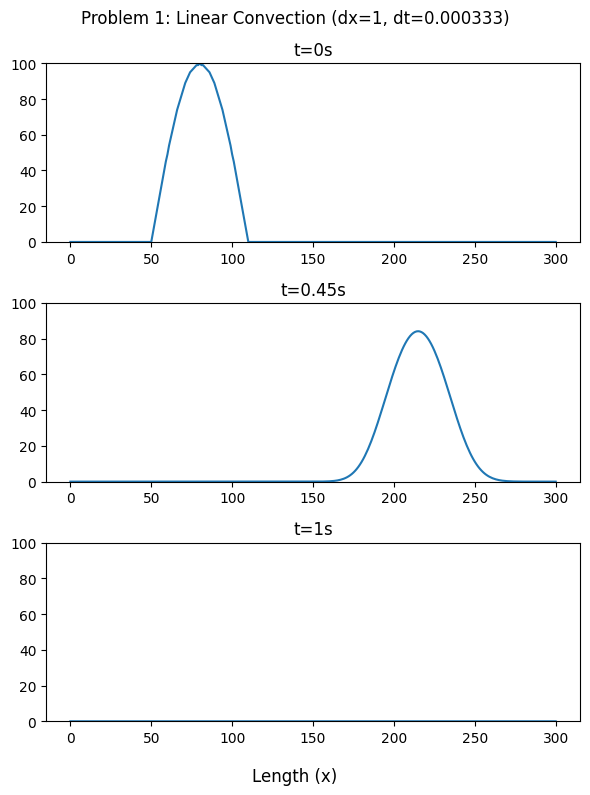

In [14]:
idx = (np.abs(T - 0.45)).argmin()
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,100])
plt.subplot(3,1,2)
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=0.45s')
plt.ylim([0,100])
plt.subplot(3,1,3)
plt.plot(X, U[T.size-1, :].ravel())
plt.title(label='t=1s')
plt.ylim([0,100])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 1: Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

## Problem 2

In [15]:
L = 4
Tend = 6
def u0(x):
    U = np.zeros_like(x)
    index = np.where(np.logical_and(x>=0.25, x<=1.25))
    U[index] = 1.25 - x[index]
    U[np.where(x<0.25)] = 1
    return U
dx = 0.05
X = np.arange(0, L+dx, dx)

In [16]:
def FTBS_NL(X, T, dt, dx, u0):
    U = np.zeros((T.size, X.size))
    U[0, :] = u0
    for t in range(T.size-1):
        U[t+1, 0] = 1
        for x in range(1, X.size-2):
            U[t+1, x] = U[t, x] - U[t, x]*dt/dx*(U[t,x] - U[t, x-1])
    return U

### For dt=0.01

In [17]:
dt = 0.01
T = np.arange(0, Tend+dt, dt)
U0 = u0(X)
U_NL = FTBS_NL(X, T, dt, dx, U0)

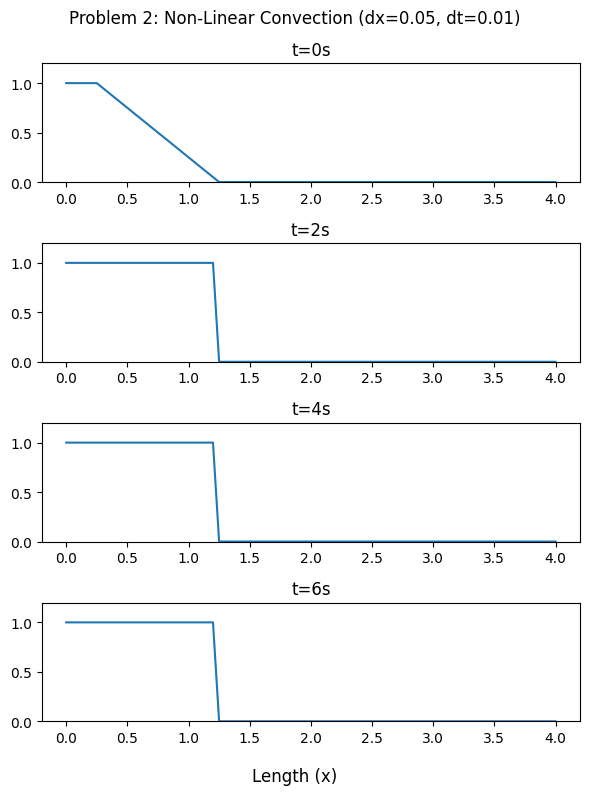

In [18]:
plt.figure(figsize=(6,8))
plt.subplot(4,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,1.2])
plt.subplot(4,1,2)
idx = (np.abs(T - 2)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=2s')
plt.ylim([0,1.2])
plt.subplot(4,1,3)
idx = (np.abs(T - 4)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=4s')
plt.ylim([0,1.2])
plt.subplot(4,1,4)
plt.plot(X, U_NL[T.size-1, :].ravel())
plt.title(label='t=6s')
plt.ylim([0,1.2])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 2: Non-Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

### For dt=0.025

In [19]:
dt = 0.025
T = np.arange(0, Tend+dt, dt)
U0 = u0(X)
U_NL = FTBS_NL(X, T, dt, dx, U0)

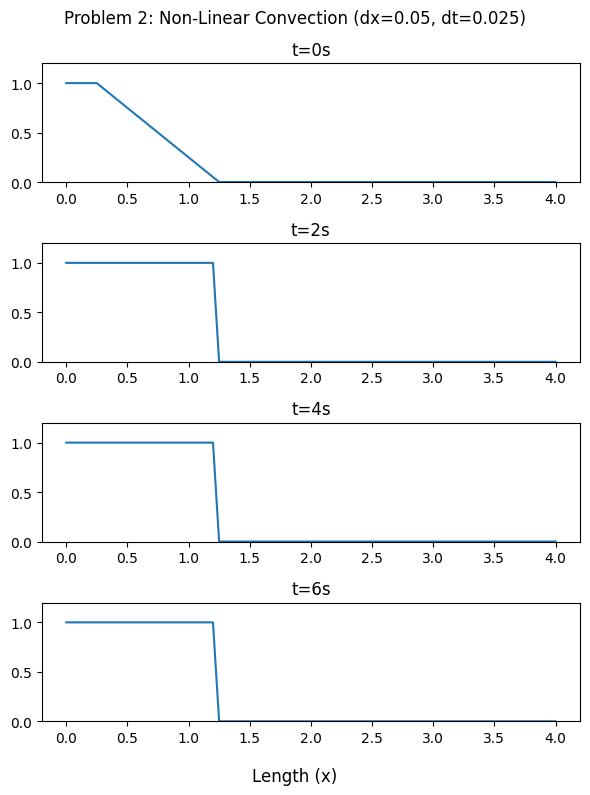

In [20]:
plt.figure(figsize=(6,8))
plt.subplot(4,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,1.2])
plt.subplot(4,1,2)
idx = (np.abs(T - 2)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=2s')
plt.ylim([0,1.2])
plt.subplot(4,1,3)
idx = (np.abs(T - 4)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=4s')
plt.ylim([0,1.2])
plt.subplot(4,1,4)
plt.plot(X, U_NL[T.size-1, :].ravel())
plt.title(label='t=6s')
plt.ylim([0,1.2])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 2: Non-Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

### dt = 0.05

In [21]:
dt = 0.05
T = np.arange(0, Tend+dt, dt)
U0 = u0(X)
U_NL = FTBS_NL(X, T, dt, dx, U0)

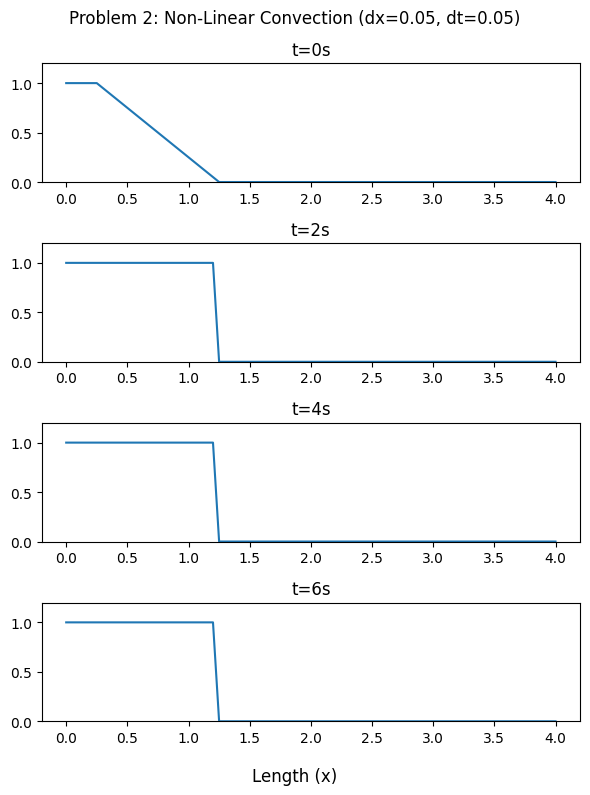

In [22]:
plt.figure(figsize=(6,8))
plt.subplot(4,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,1.2])
plt.subplot(4,1,2)
idx = (np.abs(T - 2)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=2s')
plt.ylim([0,1.2])
plt.subplot(4,1,3)
idx = (np.abs(T - 4)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=4s')
plt.ylim([0,1.2])
plt.subplot(4,1,4)
plt.plot(X, U_NL[T.size-1, :].ravel())
plt.title(label='t=6s')
plt.ylim([0,1.2])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 2: Non-Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

### dt = 0.1

In [23]:
dt = 0.01
T = np.arange(0, Tend+dt, dt)
U0 = u0(X)
U_NL = FTBS_NL(X, T, dt, dx, U0)

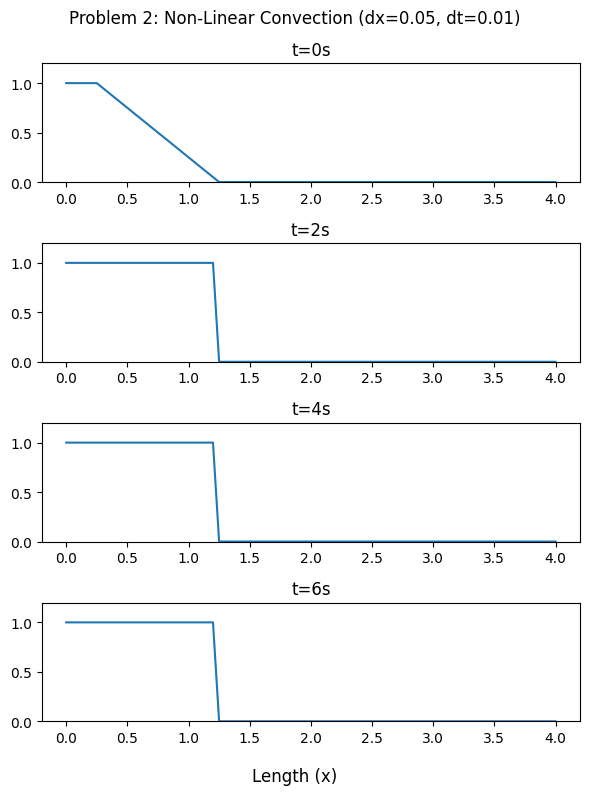

In [24]:
plt.figure(figsize=(6,8))
plt.subplot(4,1,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,1.2])
plt.subplot(4,1,2)
idx = (np.abs(T - 2)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=2s')
plt.ylim([0,1.2])
plt.subplot(4,1,3)
idx = (np.abs(T - 4)).argmin()
plt.plot(X, U_NL[idx, :].ravel())
plt.title(label='t=4s')
plt.ylim([0,1.2])
plt.subplot(4,1,4)
plt.plot(X, U_NL[T.size-1, :].ravel())
plt.title(label='t=6s')
plt.ylim([0,1.2])
plt.gcf().supxlabel('Length (x)')
plt.suptitle('Problem 2: Non-Linear Convection (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

## Problem 3

In [25]:
L = 1 #cm
alpha = 0.01
Tend = 10
def u0(x):
    U = np.zeros_like(x)
    index = np.where(np.logical_and(x>=0, x<0.5))
    U[index] = 200*x[index]
    index = np.where(np.logical_and(x>=0.5, x<=1))
    U[index] = 200*(np.ones_like(x[index])-x[index])
    return U
dx = 0.01
dt = 0.1*0.5*dx**2/alpha
X = np.arange(0, L+dx, dx)
T = np.arange(0, Tend+dt, dt)

In [26]:
def FTCS(X, T, dx, dt, u0):
    U = np.zeros((T.size, X.size))
    U[0, :] = u0
    #U[:, 0] = Ud[:, X.size-1]=0 
    for t in range(T.size-1):
        for x in range(1, X.size-2):
            U[t+1, x] = U[t, x] + alpha*dt/dx/dx*(U[t,x+1] - 2*U[t, x] + U[t,x-1])
    return U

In [27]:
U0 = u0(X)
U = FTCS(X, T, dx, dt, U0)

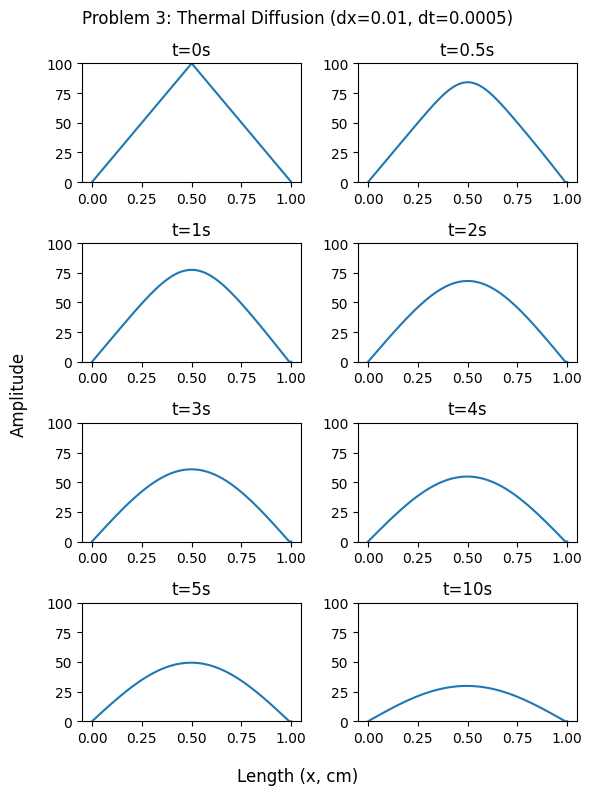

In [28]:
plt.figure(figsize=(6,8))
plt.subplot(4,2,1)
plt.plot(X, U0)
plt.title(label='t=0s')
plt.ylim([0,100])

plt.subplot(4,2,2)
idx = (np.abs(T - 0.5)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=0.5s')
plt.ylim([0,100])

plt.subplot(4,2,3)
idx = (np.abs(T - 1)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=1s')
plt.ylim([0,100])

plt.subplot(4,2,4)
idx = (np.abs(T - 2)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=2s')
plt.ylim([0,100])

plt.subplot(4,2,5)
idx = (np.abs(T - 3)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=3s')
plt.ylim([0,100])

plt.subplot(4,2,6)
idx = (np.abs(T - 4)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=4s')
plt.ylim([0,100])

plt.subplot(4,2,7)
idx = (np.abs(T - 5)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=5s')
plt.ylim([0,100])

plt.subplot(4,2,8)
idx = (np.abs(T - 10)).argmin()
plt.plot(X, U[idx, :].ravel())
plt.title(label='t=10s')
plt.ylim([0,100])

plt.gcf().supxlabel('Length (x, cm)')
plt.gcf().supylabel('Amplitude')
plt.suptitle('Problem 3: Thermal Diffusion (dx={}, dt={})'.format(dx, np.round(dt, 6)))
plt.tight_layout()

## Problem 4

In [29]:
Lx = 1 #m
Ly = 0.04 #
alpha = 0.000217
rho = 800
Tend = 2
def u0(y):
    U = np.zeros_like(y)
    U[0]=40
    return U
    
dx = dy = 0.001
dt = 0.002
X = np.arange(0, Lx+dx, dx)
Y = np.arange(0, Ly+dy, dy)
T = np.arange(0, Tend+dt, dt)

In [30]:
def FTCS_Navier(X, T, x, dt, u0, dp_dx):
    U = np.zeros((T.size, X.size))
    U[0, :] = u0
    U[:, X.size-1]=0
    U[:,0]=40
    for t in range(T.size-1):
        for x in range(1, X.size-2):
            U[t+1, x] = U[t, x] + (alpha*dt/dx/dx*(U[t,x+1] - 2*U[t, x] + U[t,x-1])) - (dp_dx / rho*dt)
    return U

### For dp/dx = 0

In [31]:
U0 = u0(Y)
U = FTCS_Navier(Y, T, dy, dt, U0, 0)

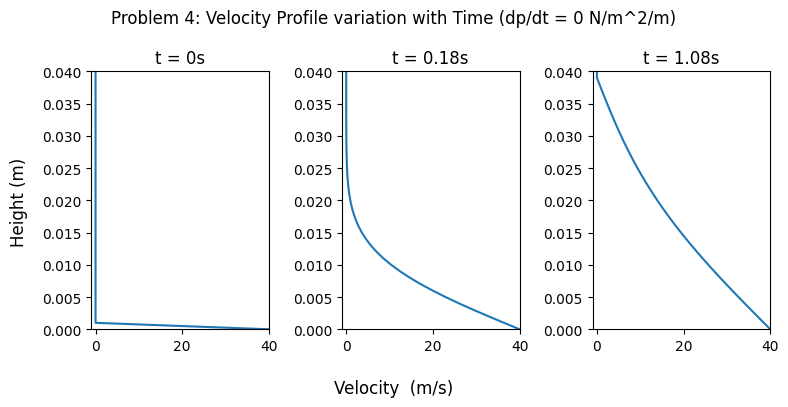

In [32]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.plot(U[0,:].ravel(), Y)
plt.title('t = 0s')
plt.xlim([-1,40])
plt.ylim([0,0.04])

plt.subplot(1,3,2)
idx = (np.abs(T - 0.18)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 0.18s')
plt.xlim([-1,40])
plt.ylim([0,0.04])

plt.subplot(1,3,3)
idx = (np.abs(T - 1.08)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 1.08s')
plt.xlim([-1,40])
plt.ylim([0,0.04])

plt.suptitle("Problem 4: Velocity Profile variation with Time (dp/dt = 0 N/m^2/m)")
plt.gcf().supxlabel('Velocity  (m/s)')
plt.gcf().supylabel('Height (m)')
plt.tight_layout()

### For dp/dx = 20000.0N/m^2/m

In [33]:
U0 = u0(Y)
U = FTCS_Navier(Y, T, dy, dt, U0, 20000)

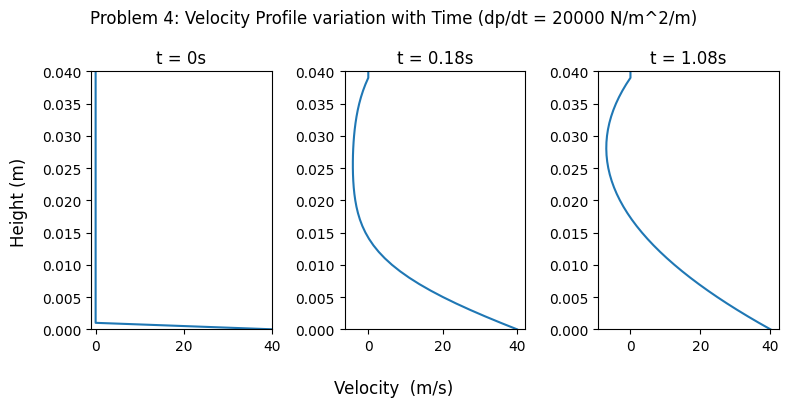

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.plot(U[0,:].ravel(), Y)
plt.title('t = 0s')
plt.xlim([-1,40])
plt.ylim([0,0.04])

plt.subplot(1,3,2)
idx = (np.abs(T - 0.18)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 0.18s')
#plt.xlim([0,40])
plt.ylim([0,0.04])

plt.subplot(1,3,3)
idx = (np.abs(T - 1.08)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 1.08s')
#plt.xlim([-40, 0])
plt.ylim([0,0.04])

plt.suptitle("Problem 4: Velocity Profile variation with Time (dp/dt = 20000 N/m^2/m)")
plt.gcf().supxlabel('Velocity  (m/s)')
plt.gcf().supylabel('Height (m)')
plt.tight_layout()

## For dp/dx = -30000 N/m^2/m

In [35]:
U0 = u0(Y)
U = FTCS_Navier(Y, T, dy, dt, U0, -30000)

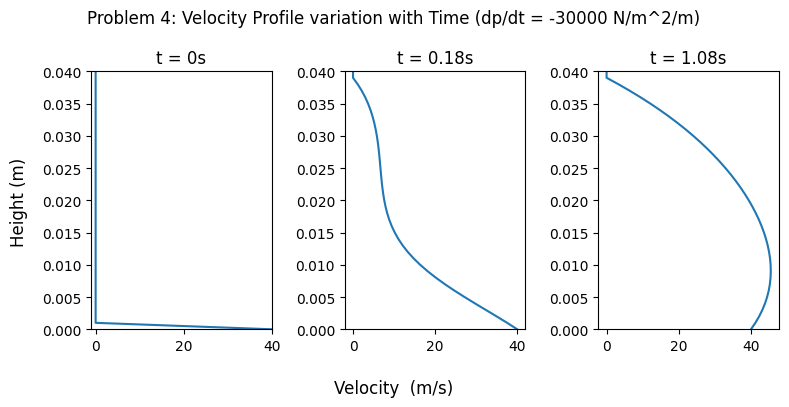

In [36]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.plot(U[0,:].ravel(), Y)
plt.title('t = 0s')
plt.xlim([-1,40])
plt.ylim([0,0.04])

plt.subplot(1,3,2)
idx = (np.abs(T - 0.18)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 0.18s')
#plt.xlim([0,40])
plt.ylim([0,0.04])

plt.subplot(1,3,3)
idx = (np.abs(T - 1.08)).argmin()
plt.plot(U[idx,:].ravel(), Y)
plt.title('t = 1.08s')
#plt.xlim([0, 40])
plt.ylim([0,0.04])

plt.suptitle("Problem 4: Velocity Profile variation with Time (dp/dt = -30000 N/m^2/m)")
plt.gcf().supxlabel('Velocity  (m/s)')
plt.gcf().supylabel('Height (m)')
plt.tight_layout()